In [1]:
import networkx as nx
import numpy as np
import math
import itertools

True


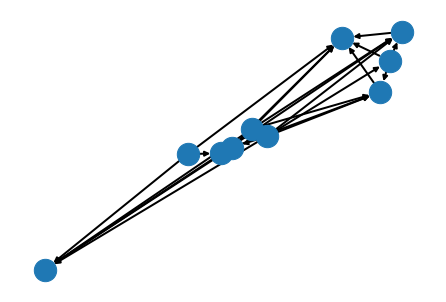

In [3]:
n = 10

G = nx.gnp_random_graph(n=n, p=0.5, directed=True)
G = nx.DiGraph([(u,v) for (u,v) in G.edges() if u < v])

X = np.random.normal(0, 1, (n, 5))

print(nx.is_directed_acyclic_graph(G))
nx.draw(G, node_size=500, width=2.)

In [5]:
list(G.edges(data=True))

[(0, 5, {}),
 (0, 8, {}),
 (0, 9, {}),
 (5, 6, {}),
 (5, 8, {}),
 (1, 2, {}),
 (1, 3, {}),
 (1, 4, {}),
 (1, 6, {}),
 (1, 7, {}),
 (1, 8, {}),
 (2, 3, {}),
 (2, 6, {}),
 (2, 7, {}),
 (2, 8, {}),
 (2, 9, {}),
 (3, 7, {}),
 (3, 8, {}),
 (3, 9, {}),
 (4, 6, {}),
 (4, 7, {}),
 (4, 9, {}),
 (6, 9, {}),
 (7, 9, {})]

- 003: 1, 2, 3
- 012: 1 -> 2, 3
- 102: 1 <-> 2, 3
- 021D: 1 <- 2 -> 3
- 021U: 1 -> 2 <- 3
- 021C: 1 -> 2 -> 3
- 111D: 1 <-> 2 <- 3
- 111U: 1 <-> 2 -> 3
- 030T: 1 -> 2 -> 3, 1 -> 3
- 030C: 1 <- 2 <- 3, 1 -> 3
- 201: 1 <-> 2 <-> 3
- 120D: 1 <- 2 -> 3, 1 <-> 3
- 120U: 1 -> 2 <- 3, 1 <-> 3
- 120C: 1 -> 2 -> 3, 1 <-> 3
- 210: 1 -> 2 <-> 3, 1 <-> 3
- 300: 1 <-> 2 <-> 3, 1 <-> 3

In [67]:
triadic_census = nx.triadic_census(G)
graphlet_codes = ['021U', '021D', '021C', '030T', '012', '003']
d = dict(filter(lambda e: e[0] in graphlet_codes, triadic_census.items()))
d['edges'] = len(G.edges)
d

{'003': 6,
 '012': 31,
 '021D': 14,
 '021U': 17,
 '021C': 25,
 '030T': 27,
 'edges': 28}

In [86]:
n = len(G.nodes)
r = 3
tot_triads = math.factorial(n) / (math.factorial(n - r) * math.factorial(r))

{k: round(v / tot_triads, 4) for k, v in d.items()}

{'003': 0.05,
 '012': 0.2583,
 '021D': 0.1167,
 '021U': 0.1417,
 '021C': 0.2083,
 '030T': 0.225,
 'edges': 0.2333}

In [34]:
graphlet = nx.DiGraph()
graphlet.add_edges_from([
    (0, 1), 
    (1, 2), 
    (0, 2),
])

graphlets = []
for sub_nodes in itertools.combinations(G.nodes(),len(graphlet.nodes())):
    sub_graph = G.subgraph(sub_nodes)
    if nx.is_weakly_connected(sub_graph) and nx.is_isomorphic(sub_graph, graphlet):
        graphlets.append(sub_graph.edges())

len(graphlets)

10